# <font color ='plum'> Input - Output NN ~ Linear Regression w/ MSE optimizer </font>

In [1]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))
import numpy as np
import tensorflow.keras as tfk
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# GPUs:  1
CPU times: total: 5.31 s
Wall time: 6.57 s


In [2]:
df = pd.read_csv("C:/Users/diablo/3D Objects/YYY_Tensorflow/data/heart.data.csv")
df = df[[ 'biking', 'smoking', 'heart.disease']] 

In [3]:
df.head(3)

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803


In [4]:
df.describe()

,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


In [5]:
target = 'heart.disease'
y=df[target].to_numpy()
X = df.loc[:, df.columns != target]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=465)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

reg_model.fit(X_train,y_train)

LinearRegression()

In [9]:
print(reg_model.score(X_train,y_train))

0.9798457883392714


In [10]:
reg_model.coef_, reg_model.intercept_

# pre_scale: (array([-0.20076448,  0.17827087]), 15.017182027682155)

(array([-14.66961522,   5.16521963]), 14.831230760702002)

In [11]:
# (array([-14.81400097,   5.24488822]), 14.886239364884904) confirmed same with sreeni

In [12]:
pred = reg_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [14]:
mae(pred,y_test)

0.5365576724820269

In [15]:
mse(pred,y_test), mse(pred,y_test)**0.5

(0.46071200704187526, 0.6787576939098925)

In [16]:
np.mean(pred-y_test)**0.5

C:\Users\diablo\AppData\Local\Temp\ipykernel_10848\3309069358.py:1: RuntimeWarning: invalid value encountered in double_scalars
  np.mean(pred-y_test)**0.5


nan

In [17]:
X_train.mean()

0.5062888947392422

# <font color ='plum'> Apply NN ~ SGD </font>

In [18]:
import tensorflow.keras as tfk

In [19]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, InputLayer
from tensorflow.keras.optimizers import SGD

In [20]:
model = tfk.models.Sequential()

In [21]:
opt = SGD(learning_rate =0.1)

In [22]:
X_train.shape

(398, 2)

In [23]:
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1))
model.compile(loss='mse',optimizer=opt)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
%%time
history = model.fit(X_train, y_train, verbose=0,epochs=28, validation_data = (X_test, y_test))

CPU times: total: 2.58 s
Wall time: 2.23 s


In [25]:
hist=model.history.history

<AxesSubplot:>

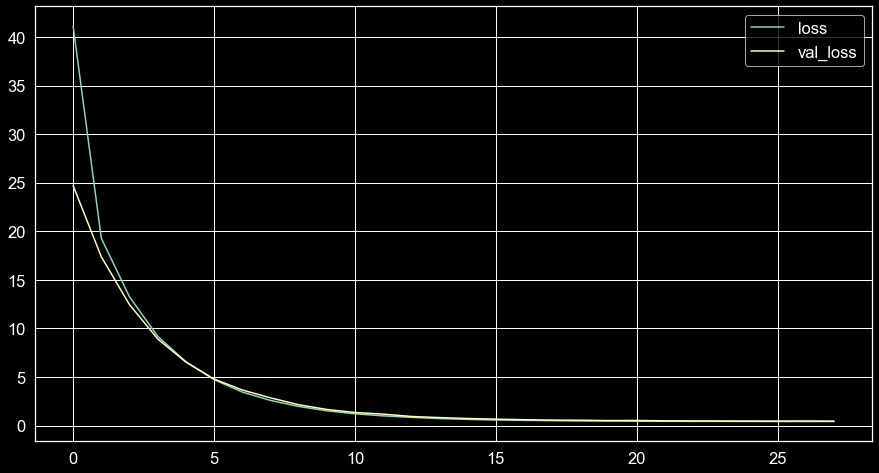

In [26]:
pd.DataFrame(hist).plot()

In [27]:
weights=model.layers[0].get_weights()[0]
biases=model.layers[0].get_weights()[1]
weights,biases

(array([[-14.458705 ],
        [  5.3260317]], dtype=float32),
 array([14.652039], dtype=float32))

In [28]:
# learning_rate = 0.1
# (array([[-14.827212 ],
#         [  5.2242913]], dtype=float32),
#  array([14.870144], dtype=float32))

# MSE: 0.45138202063390553
# MAE: 0.525869890771895

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.layers[0]

In [31]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4695


0.4694518744945526

In [32]:
# (array([-14.81400097,   5.22417421]), 14.906953371822128)
# (array([-14.81400097,   5.24488822]), 14.886239364884904) confirmed same with sreeni

In [33]:
pred = model.predict(X_test)

In [34]:
print(f"MSE: {mse(y_test, pred)}")
print(f"MAE: {mae(y_test,pred)}")

MSE: 0.46945176492828794
MAE: 0.5373368245939864
